# 2.3 Linear Discriminant Analysis 

In the following, we will work on the Iris data Set. As a little helper for you, we will use an out-of-the-box method from the seaborn package to visualize the data set. The seaborn package is a matplotlib-based visualization package. You can install it by typing the following command in the terminal: "__sudo pip3 install seaborn__". If you run the script and you do not see the data, also install the cairo backend with "__sudo pip3 install cairocffi__".

__Task:__ Which of the four features is the most discriminant one? 

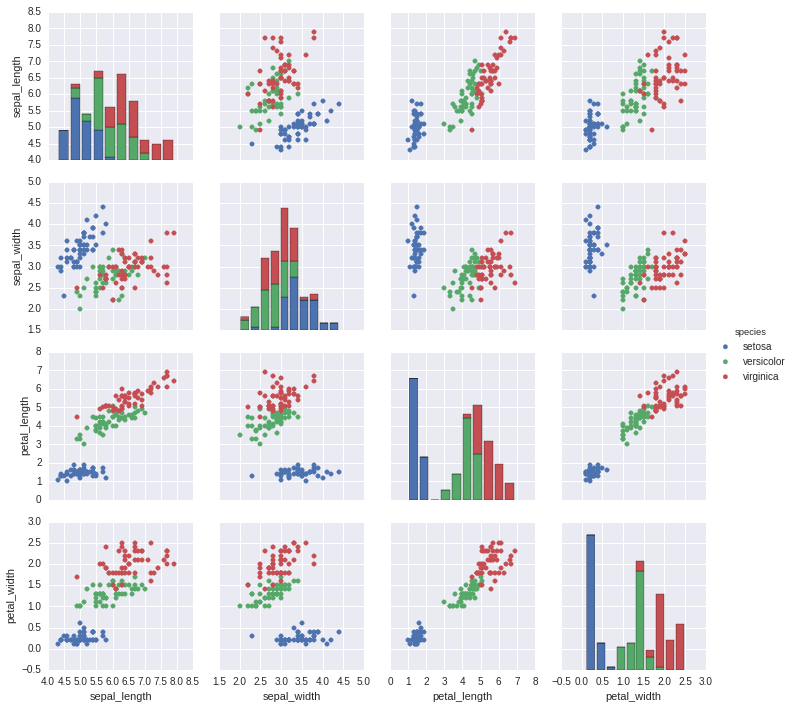

In [2]:
%matplotlib inline
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

sns.plt.show()

### Implementation of a 2-class LDA
 
__Task__: Write a function *train_LDA()* that uses training data $\mathbf{X}$ and labels $\mathbf y$ to train an LDA model and returns weights $\mathbf w$ and a bias $\mathbf b$ for a two-class problem. Review the lecture slides for the theoretical backgrounds.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def train_lda(X, y):
    ''' Train an LDA
    Input: X data matrix with shape NxD
           y label vector with shape Nx1 und zwar durch aufruf vorsortiert nur die mit Klasse 1 oder 2
    Output: weight vector with shape Nx1 
            bias term - real-valued '''
    means = []
    covs = []
    #print("X ist diesmal: \n", X)

    #print("Covs original: \n",covs)
    #print("means original: \n",means)
    
    # hier werden nur 
    classes = np.unique(y)   #Find the unique elements of an array - alle verschiedenen... also hier [1,2] wegen Aufruf...
    for group in classes:    # also Schleife zweimal, classes = 1, 2
        #nimmt alle die, bei deren Index i y[i] == group
        X_g = X[y == group, :]  #array der Training-Data, dabei die aus class==group raussortieren --> X_g
        #print("X_g ist diesmal: \n", X_g)
        # covariance matrix for this group / class, as defined in slide 18 as Sk
        # dot Kreuzprodukt
        Cov_g = 1./(len(X_g)-1)*np.dot((X_g-np.mean(X_g,0)).T,(X_g-np.mean(X_g,0)))  #4x4 Matrix, weil 4 Features      
        #print("Cov_g: group \n",group, Cov_g)
        means.append(np.mean(X_g,0))        
        covs.append(Cov_g)   #the two class matrices matrices appended (array of 2 arrays)
        #print("Covs after append \n",covs)
        #print("means after append: \n",means)

    ''' weights, as defined in page 29, are calculated after Fisher Criteria as transpose of the "total within_class" 
    Cov.matrice Sw, multiplied with the delta of the means (page 47) --> Fisher criterion
    covs[0] covs[1] are the cov-matrices of class 1 and 2, there sum (component-wise) is the total within class cov matrix '''
    #print("covs[0]: \n", covs[0])
    #print("covs[1]: \n", covs[1])
    #print("covs[0]+covs[1]: \n", covs[0]+covs[1])
    
    #Folie 47, w berechnet aus inverser der total withinclass Cov-Matrix mal delta Means
    weights = np.dot(np.linalg.pinv(covs[0]+covs[1]),(means[1]-means[0]))
    #print("weights: \n", weights)
    
    bias = -0.5*np.dot(weights,(means[0]+means[1]))    
    
    #print("bias: \n", bias)

    return weights, bias


## Validation of the trained LDA model 

__Task__: Write a function *apply_lda()* that uses the weights and bias of the *train_LDA(X, y)* function and returns a vector of predicted classes.

In [4]:
def apply_lda(X_test, weights, bias):
    '''Predict the class label per sample 
    Input: X_test - data matrix with shape NxD
           weight vector and bias term from train_LDA
    Output: vector with entries 1 or 2 depending on the class
    after w has been determined, return to y(x) = wTx + b, and check, if it ist < or > zero (decision)'''    
    
    # apply y(x)=wTx + bias
    #print(np.dot(X_test,np.array([weights]).T))
    #print(np.squeeze(np.dot(X_test,np.array([weights]).T)))
    #squeeze: Remove single-dimensional entries from the shape of an array.
    y_dist = np.squeeze(np.dot(X_test,np.array([weights]).T))+bias  #distance of 
    #print(y_dist)
    y_test = 1+(np.sign(y_dist)+1)/2    #classifier: decision 1 or 2 for any X if y_dist is below or 
                                        #above decision line, according to y > oder < 0 (y=0 is the desision hyperplane)
    return y_test

## Test your implementations with the Iris data set

In Assignment 1, you have already been inspecting the iris data set. Now, train an LDA on the training data of the iris data set (using only class 1 and 2) and validate it on your training and test data.

#### Q2.3.1 Which accuracy can you achieve on the iris data test set?

In [7]:
# Load the iris data set 
X_train_all = np.loadtxt('data/iris_train.data', delimiter=' ', dtype=float)
y_train_all = np.loadtxt('data/iris_train.labels', dtype=int)
X_test_all = np.loadtxt('data/iris_test.data', delimiter=' ', dtype=float)
y_test_all = np.loadtxt('data/iris_test.labels', dtype=int)

#print(y_train_all)
#print(X_train_all)
# only select classes 1 and 2, die stehen in Labels
X_train = X_train_all[np.logical_or(y_train_all==1,y_train_all==2)]
y_train = y_train_all[np.logical_or(y_train_all==1,y_train_all==2)]
#print(X_train)

# only select classes 1 and 2, die stehen in Labels
X_test = X_test_all[np.logical_or(y_test_all==1,y_test_all==2)]  
y_test = y_test_all[np.logical_or(y_test_all==1,y_test_all==2)]

weights, bias = train_lda(X_train, y_train)  #finde weight vector w und bias b
y_prediction = apply_lda(X_test, weights, bias) #internally berechne Y(X) = wT X + b for every training sample. return 
#y_prediction is 1xn Vector, with a "1" oder "2" entry, according to predicted class 

print("len y_pred: ", len(y_prediction))
print("len y_test: ", len(y_test))
print("y_prediction", y_prediction)
print("y_test", y_test)
#print("y_prediction[1]", y_prediction[1])
#print("test map: ", map(int, 2.354))
#print("compare_one: ", y_test[1], map(int,y_prediction[1]))

# nicht funktionierende Ausgangsversion
print("compare: ", (y_test==map(int,y_prediction)))
print('The Accuracy on the test set is %.2f%%' %(float(sum(y_test==map(int,y_prediction)))/len(y_test)*100))

# korrigierte Version
print("compare: ", np.array(y_test, dtype=int) == np.array(y_prediction, dtype=int))
print('The Accuracy on the test set is %.2f%%' %(float(sum(np.array(y_test, dtype=int)==np.array(y_prediction, dtype=int)))/len(y_test)*100))



len y_pred:  35
len y_test:  35
y_prediction [ 2.  2.  1.  1.  2.  2.  1.  2.  2.  1.  2.  1.  2.  1.  2.  1.  2.  1.
  1.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  1.  2.  1.  2.]
y_test [2 2 1 1 2 2 1 2 2 1 2 1 2 1 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2]
compare:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
The Accuracy on the test set is 0.00%
compare:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True]
The Accuracy on the test set is 97.14%


In [6]:

# You have numbers
3  # => 3

# Math is what you would expect
1 + 1  # => 2
8 - 1  # => 7
10 * 2  # => 20
35 / 5  # => 7

2 ** 4  # => 16
-5 and 0
4 == True

"{} is a {}".format("This", "placeholder")
"{0} can be {1}".format("strings", "formatted")
# You can use keywords if you don't want to count.
"{name} wants to eat {food}".format(name="Bob", food="lasagna")
"{0} can be {1}".format("strings", "formatted")

li = []
li.append(1)  # li is now [1]
li.append(2)  # li is now [1, 2]
li.append(4)  # li is now [1, 2, 4]
li.append(3)  # li is now [1, 2, 4, 3]
li

li[1:3]  # => [2, 4]
# Omit the beginning
li[::-2]  # => [4, 3]

#li(7)

try:
    # Use "raise" to raise an error
    #raise IndexError("This is an index error")
    li(7)
except IndexError as e:
    pass  # Pass is just a no-op. Usually you would do recovery here.
except (TypeError, NameError):
    #print("Type- or NameError")
    pass  # Multiple exceptions can be handled together, if required.
else:  # Optional clause to the try/except block. Must follow all except blocks
    print("All good!")  # Runs only if the code in try raises no exceptions
finally:  # Execute under all circumstances
    pass
    #print ("We can clean up resources here")

def varargs(*args):
    return args


varargs(1, 2, 3)  # => (1, 2, 3)
        
        

(1, 2, 3)